# Task 4: Chaotic dynamics

### Part 1: Consider the discrete map $x_{n+1}=rx_n(1-x_n), n \in \mathbb{N}$ with the parameter $r \in (0,4]$.
1. Vary r from 0 to 2. Which bifurcation occur? At which numerical values do you find steady states of the systems?

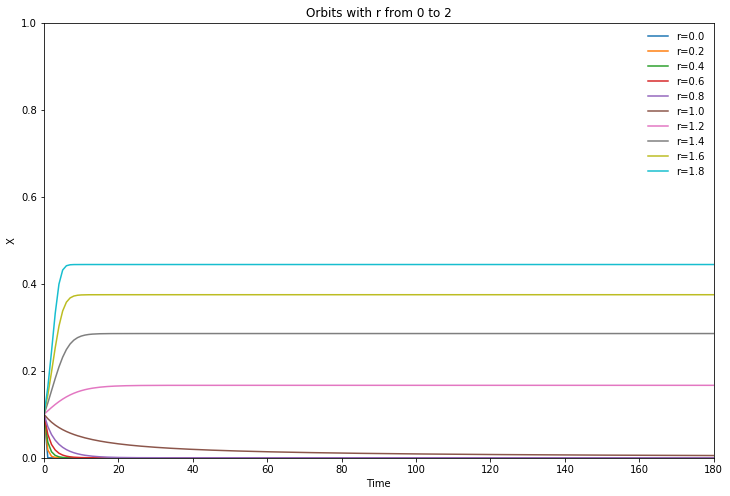

In [29]:
# Imports.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Logistic function
def logistic(r, x):
    return r * x * (1 - x)

# Iterate the function for a given growth rate, and plot the results.
def logistic_equation_orbit(x0, r, iteration, ax=None):
    X = []
    T = []
    t = 0
    x = x0
    
    # Iterate the logistic equation, printing only after 'skip' steps.
    for i in range(iteration):
        X.append(x)
        T.append(t)
        t+=1
        x = logistic(r,x);
    return T,X
    
    
# Varying from 0 to 2.
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_ylim(0, 1)
ax.set_xlim(0, 180)
ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.set_title(f"Orbits with r from 0 to 2")

for r in np.arange(0,2,0.2): 
    
    T,X=logistic_equation_orbit(0.1, r, 200)
    plt.plot(T, X,label='r=%.1f'%r)
    plt.legend(loc='upper right', frameon=False)

2. Now vary r from 2 to 4. 

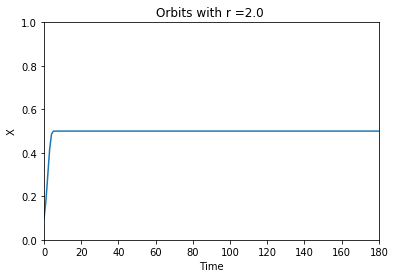

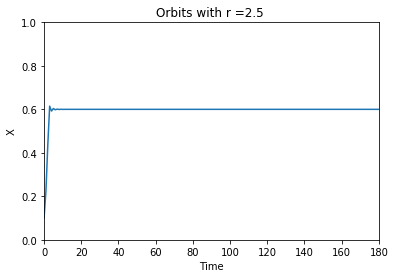

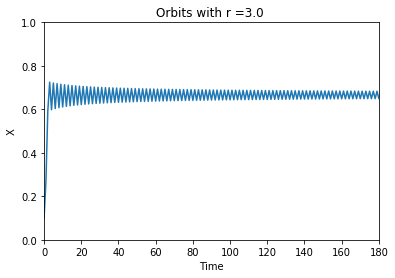

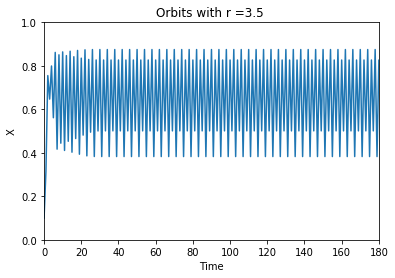

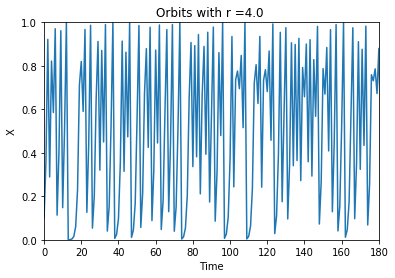

In [30]:
# Varying from 2 to 4.


for r in np.arange(2,4.1,0.5): 
    fig, ax = plt.subplots(1, 1)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 180)
    ax.set_xlabel('Time')
    ax.set_ylabel('X')
    ax.set_title(f"Orbits with r =%.1f "%r)
    T,X=logistic_equation_orbit(0.1, r, 200)
    plt.plot(T, X)

### 3. Plot the bifurcation diagram

Interval for bifurcation 1 is (1.000, 1.015)
Interval for bifurcation 2 is (2.996, 3.002)
Interval for bifurcation 3 is (3.448, 3.450)
Interval for bifurcation 4 is (3.543, 3.545)
Approximate bifurcation point 1 is 1.007
Approximate bifurcation point 2 is 2.999
Approximate bifurcation point 3 is 3.449
Approximate bifurcation point 4 is 3.544


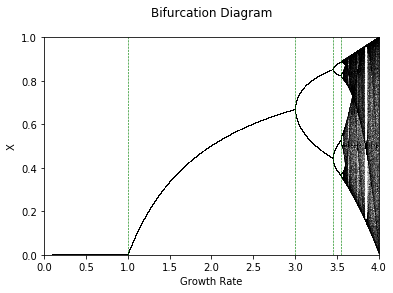

In [32]:
n = 10000
r = np.linspace(0.1, 4.0, n)
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)
fig, ax1 = plt.subplots(1, 1)
plt.subplots_adjust(hspace=0.4)

X = []

for i in range(iterations):
    x = logistic(r, x)
    
    # Compute the partial sum of the Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    
    # Display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.1)
        
ax1.set_xlim(0, 4)
ax1.set_ylim(0, 1)
ax1.set_xlabel("Growth Rate")
ax1.set_ylabel("X")
ax1.set_title("Bifurcation Diagram\n")

bifurcations = []
bifurcations_point = []

sign = 0
for i in range (0, lyapunov.size):
    temp = sign
    if(lyapunov[i]<0):
        sign = -1
    elif(lyapunov[i]>0):
        sign = +1
    if(temp != sign and temp != 0):
        bifurcations.append(r[i])

for i in range(0, 8, 2):
    print(f"Interval for bifurcation {int((i/2)+1)} is ({bifurcations[i]:.3f}, {bifurcations[i+1]:.3f})")
    bifurcations_point.append((bifurcations[i] + bifurcations[i+1])/2)

for i in range(len(bifurcations_point)):
    print(f"Approximate bifurcation point {int(i+1)} is {bifurcations_point[i]:.3f}")
    ax1.axvline(x=[bifurcations_point[i]], ls='--', lw=0.6, color='g')

### Part 2: Lorenz attractor
1. Visualize a single trajectory of the Lorenz system starting at x_0 = (10, 10, 10), until you reach the end time of $T_{end} = 1000$, at the parameter
values $\sigma =10, \beta =\frac{8}{3} and \rho =28$.
2. Test this by plotting another trajectory from $\hat{x}_0 = (10 + 10^{−8}, 10, 10)$ in 3D, and separately plot the diﬀerence between the two trajectories over time (plot $||(x(t) − \hat{x}(t)||^2$ against t, where
$x(t), \hat{x}(t) \in R^3$ are the two trajectories for the two initial conditions). At what time is the diﬀerence between the points on the trajectory larger than 1?

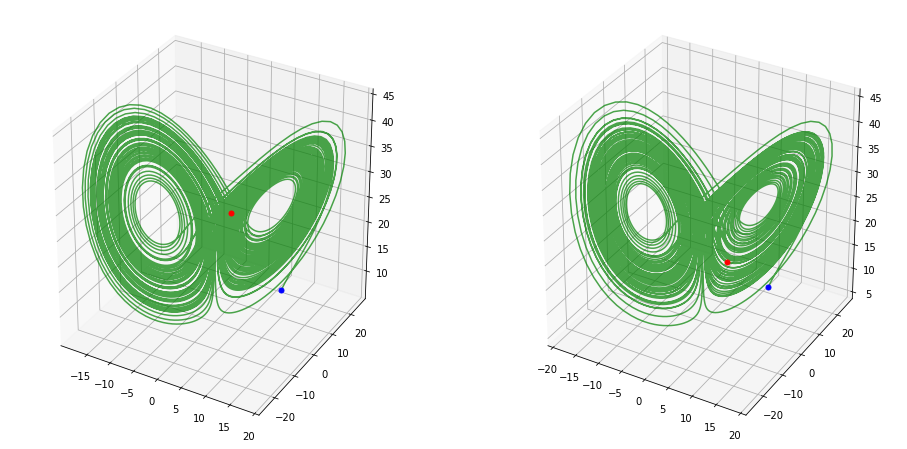

In [13]:
from scipy.spatial import distance

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

simulations = []

def d(x1, y1, z1, x2, y2, z2):
    p1 = (x1, y1, z1)
    p2 = (x2, y2, z2)
    return distance.euclidean(p1, p2)

def f(state, t):
    global rho, sigma, beta
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

def lorenz(r = 28.0, 
           s = 10.0, 
           b = 8.0 / 3.0, 
           state0 = [10.0, 10.0, 10.0],
           t = np.arange(0.0, 1000, 0.01),
           ax = None,
           line_color = 'g',
           start_color = 'b',
           end_color = 'r',
           point_size = 5,
           append = True):

    global rho, sigma, beta, simulations
    
    rho = r
    sigma = s
    beta = b
    
    states = odeint(f, state0, t)
    if(append):
        simulations.append(states)
    
    ax.plot(states[:, 0], states[:, 1], states[:, 2], color=line_color, alpha=0.7)

    # Starting point.
    ax.plot([state0[0]], [state0[1]], [state0[2]], 'ok', ms=point_size, color=start_color, alpha=1)

    # Ending point.
    ax.plot([states[int(states.size/3 - 1)][0]],  
            [states[int(states.size/3 - 1)][1]], 
            [states[int(states.size/3 - 1)][2]],'ok', ms=point_size, color=end_color, alpha=1)

fig = plt.figure(figsize=(16, 8))

ax0 = fig.add_subplot(1, 2, 1, projection='3d')
lorenz(ax=ax0, t = np.arange(0.0, 100, 0.01))

ax1 = fig.add_subplot(1, 2, 2, projection='3d')
lorenz(ax=ax1, t = np.arange(0.0, 100, 0.01), state0 = [10.0 + 0.00000001, 10.0, 10.0])

dist = 0
time=[]
dist_list=[]
iter = 0
while(dist <= 1):
    dist = d(simulations[0][iter][0],
             simulations[0][iter][1],
             simulations[0][iter][2],
             simulations[1][iter][0],
             simulations[1][iter][1],
             simulations[1][iter][2],)
    time.append(iter/(simulations[0].size/3))
    dist_list.append(dist)
    iter += 1



Text(0.5, 1.0, 'Distance becomes larger than 1 after 0.2262 seconds.')

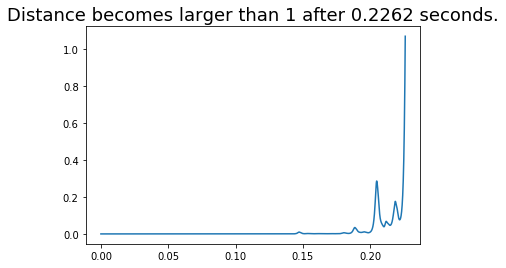

In [14]:
plt.plot(time,dist_list )
plt.title(f"Distance becomes larger than 1 after {iter/(simulations[0].size/3):.4f} seconds.", size=18)

3.Now, change the parameter ρ to the value 0.5 and again compute and plot the two trajectories. What is the diﬀerence in terms of the sensitivity to the initial conditions? Is there a bifurcation (or multiple ones) between the value 0.5 and 28? Why, or why not? Again, short arguments suﬃce.

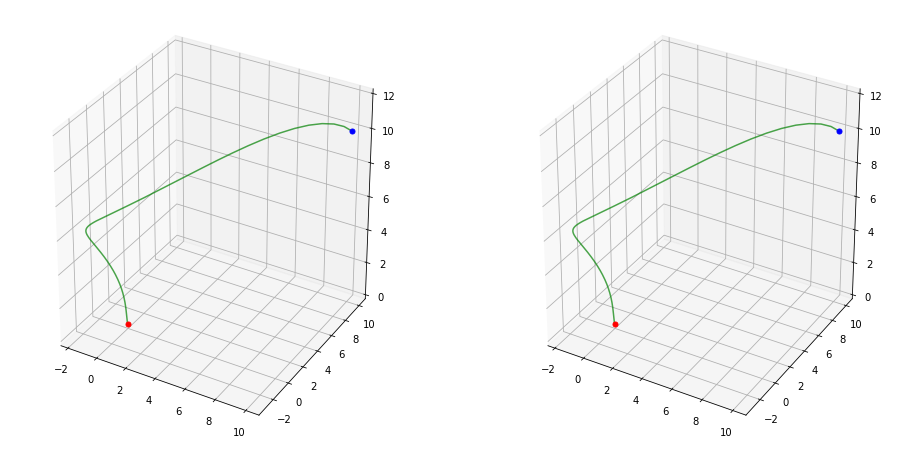

In [23]:
fig = plt.figure(figsize=(16, 8))
simulations=[]
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
lorenz(r=0.5,ax=ax0, t = np.arange(0.0, 100, 0.01), state0 = [10, 10, 10])

ax1 = fig.add_subplot(1, 2, 2, projection='3d')
lorenz(r=0.5,ax=ax1, t = np.arange(0.0, 100, 0.01), state0 = [10.0 + 0.00000001, 10.0, 10.0])

dist = 0
time=[]
dist_list=[]
iter = 0
while(iter <= 2000):
    dist = d(simulations[0][iter][0],
             simulations[0][iter][1],
             simulations[0][iter][2],
             simulations[1][iter][0],
             simulations[1][iter][1],
             simulations[1][iter][2],)
    time.append(iter/(simulations[0].size/3))
    dist_list.append(dist)
    iter += 1


Text(0.5, 1.0, 'Distance dependent on time')

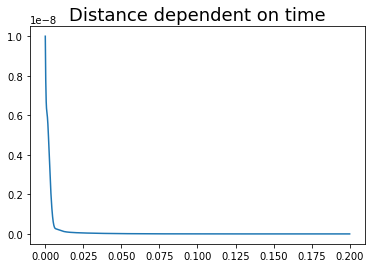

In [24]:
plt.plot(time,dist_list )
plt.title(f"Distance dependent on time", size=18)